# Tutorial: Ethanol Electro-Oxydation Reaction

## Introduction
The EOR global reactions are :
$$
\begin{align}
&\ce{CH3CH2OH + 3 H2O <--> 2 CO2 + 12 H^+ + 12 e- }  \\
&\ce{CH3CH2OH + H2O <--> CH3COOH + 4 H+ + 4 e-} \\
&\ce{CH3CH2OH <-->  CH3CHO + 2 H+ + 2 e-}
\end{align}
$$
The reaction mechanism is described by reaction steps
$$
\begin{align}
&\ce{CH3CH2OH  <--> CH3CHOH^{*} + H+ + e-} &\text{(I)}\\
&\ce{CH3CHOH^{*}  -> CH3CO^{*} + 2H+ + 2e-} &\text{(II)}\\
&\ce{CH3CHOH^{*}  <--> CH3CHO + H+ + e-} &\text{(III)}\\
&\ce{CH3CH2OH  <--> CH3CHO + 2H+ + 2e-} &(1)\\
&\ce{CH3CHO + Pt  <--> CH3CO^{*} + H+ + e-} &(2)\\
&\ce{H2O + M  <--> OH^{*} + H+ + e-} &(3)\\
&\ce{CH3CHO^{*} + OH^{*}  -> CH3COOH + Pt + M} &(4)\\
&\ce{CH3CHO^{*} + Pt  -> CO^{*} + CH3^{*}} &(5)\\
&\ce{CO^{*} + OH^{*}  -> CO2 + Pt + M + H + e-} &(6)\\
&\ce{CH3^{*} + 2OH^{*}  -> CO2 + Pt + 2M + 5H + 5e-} &(7)\\
&\ce{CH3^{*} + H+ + e-  -> CH4 + Pt} &(8)
\end{align}
$$

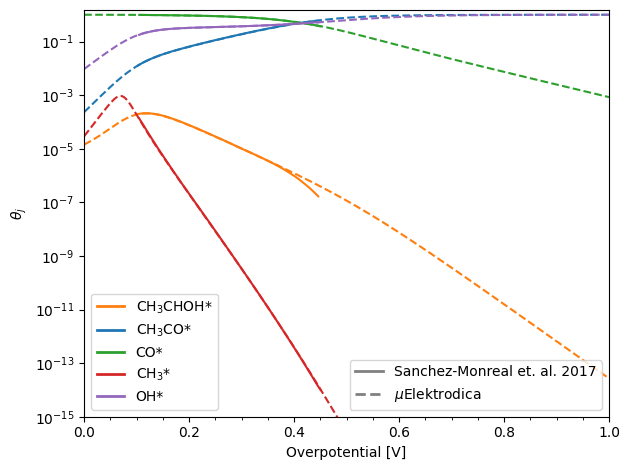

In [6]:
import os
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from melektrodica import *
directory = os.path.join("examples","SanchezMonreal2017Ethanol")
writer = Writer(log_file="SanchezMonreal2017Ethanol.log", log_directory=directory)
data = Collector(directory)
Kpy = Kpynetic(data)
melek = Calculator(Kpy)

theta_ch3choh = pd.read_csv(directory + "/SanchezMonrealData/coverages_ch3choh.csv", comment='#').values
theta_ch3co = pd.read_csv(directory + "/SanchezMonrealData/coverages_ch3co.csv", comment='#').values
theta_ch3 = pd.read_csv(directory + "/SanchezMonrealData/coverages_ch3.csv", comment='#').values
theta_co = pd.read_csv(directory + "/SanchezMonrealData/coverages_co.csv", comment='#').values
theta_oh = pd.read_csv(directory + "/SanchezMonrealData/coverages_oh.csv", comment='#').values

coverages = {
    "CH$_3$CHOH": ("tab:orange", theta_ch3choh, 0),
    "CH$_3$CO": ("tab:blue", theta_ch3co, 1),
    "CO": ("tab:green", theta_co, 2),
    "CH$_3$": ("tab:red", theta_ch3, 3),
    "OH": ("tab:purple", theta_oh, 4),
}

fname = os.path.join(directory, "SanchezMonreal_theta.png")
for label, (colors, _data, idx) in coverages.items():
    plt.plot(_data[:, 0], _data[:, 1], linestyle="-", color=colors)
    plt.plot(melek.potential, melek.results.theta[:, idx], linestyle="--", color=colors)

species_legend = [
    Line2D([0], [0], color=colors, lw=2, label=rf"{specie}*") for specie, (colors, _, _) in coverages.items()
                  ]

solutions_legend = [
    Line2D([0], [0], color="grey", lw=2, linestyle="-", label="Sanchez-Monreal et. al. 2017"),
    Line2D([0], [0], color="grey", lw=2, linestyle="--", label=r"$\mu$Elektrodica")
                    ]
first_legend = plt.legend(handles=species_legend, loc="lower left")
plt.gca().add_artist(first_legend)
plt.legend(handles=solutions_legend, loc="lower right")
plt.xlabel("Overpotential [V]")
plt.ylabel(r"$\theta_j$")
plt.yscale("log")
plt.xlim(0, 1)
plt.ylim(1e-15, 1.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()


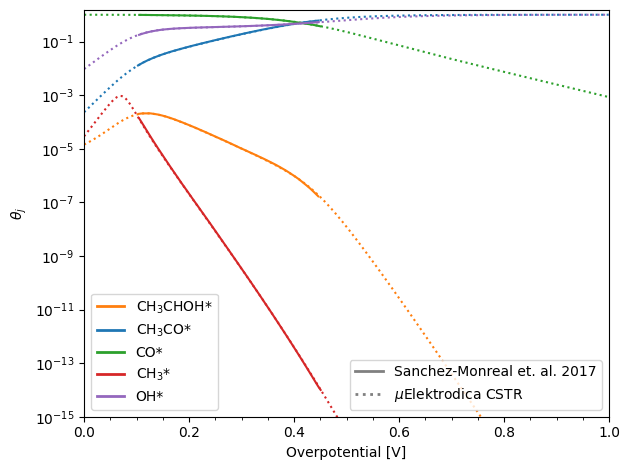

In [12]:
data_cstr = copy.deepcopy(data)
data_cstr.parameters.cstr = True
data_cstr.reactions.upsilonx = data_cstr.reactions.upsilon_c
data_cstr.parameters.Fv = 3e-4
data_cstr.parameters.Ac = 1
Kpy_cstr = Kpynetic(data_cstr)
melek_cstr = Calculator(Kpy_cstr, "cstr")

fname = os.path.join(directory, "SanchezMonreal_theta_cstr.png")
for label, (colors, _data, idx) in coverages.items():
    plt.plot(_data[:, 0], _data[:, 1], linestyle="-", color=colors)
    plt.plot(melek_cstr.potential, melek_cstr.results.theta[:, idx], linestyle=":", color=colors)
solutions_legend = [
    Line2D([0], [0], color="grey", lw=2, linestyle="-", label="Sanchez-Monreal et. al. 2017"),
    Line2D([0], [0], color="grey", lw=2, linestyle=":", label=r"$\mu$Elektrodica CSTR")
                    ]
first_legend = plt.legend(handles=species_legend, loc="lower left")
plt.gca().add_artist(first_legend)
plt.legend(handles=solutions_legend, loc="lower right")
plt.xlabel("Overpotential [V]")
plt.ylabel(r"$\theta_j$")
plt.yscale("log")
plt.xlim(0, 1)
plt.ylim(1e-15, 1.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

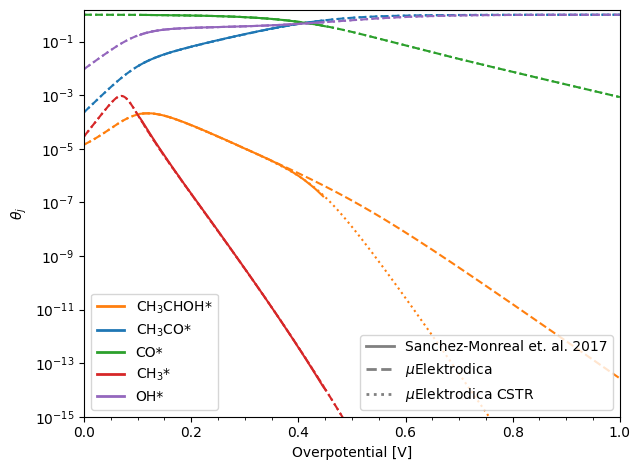

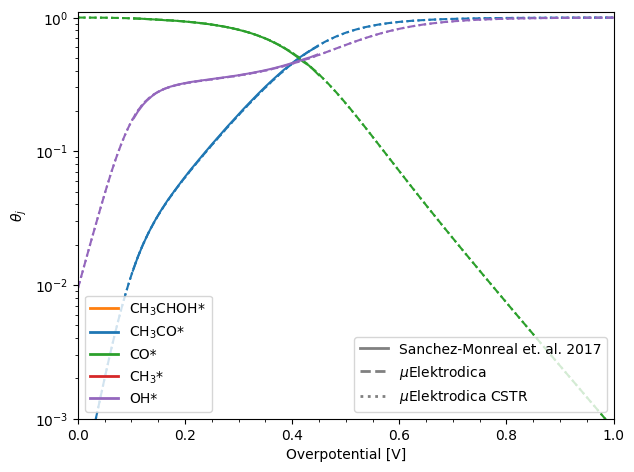

In [11]:
for zoom in {True, False}:
    for label, (colors, _data, idx) in coverages.items():
        plt.plot(_data[:, 0], _data[:, 1], linestyle="-", color=colors)
        plt.plot(melek.potential, melek.results.theta[:, idx], linestyle="--", color=colors)
        plt.plot(melek_cstr.potential, melek_cstr.results.theta[:, idx], linestyle=":", color=colors)
    solutions_legend = [
        Line2D([0], [0], color="grey", lw=2, linestyle="-", label="Sanchez-Monreal et. al. 2017"),
        Line2D([0], [0], color="grey", lw=2, linestyle="--", label=r"$\mu$Elektrodica"),
        Line2D([0], [0], color="grey", lw=2, linestyle=":", label=r"$\mu$Elektrodica CSTR")
                        ]
    first_legend = plt.legend(handles=species_legend, loc="lower left")
    plt.gca().add_artist(first_legend)
    plt.legend(handles=solutions_legend, loc="lower right")
    plt.xlabel("Overpotential [V]")
    plt.ylabel(r"$\theta_j$")
    plt.yscale("log")
    plt.minorticks_on()
    plt.tight_layout()
    plt.xlim(0, 1)
    if not zoom :
        plt.ylim(1e-15, 1.5)
    else:
         plt.ylim(1e-3, 1.1)
    plt.show()

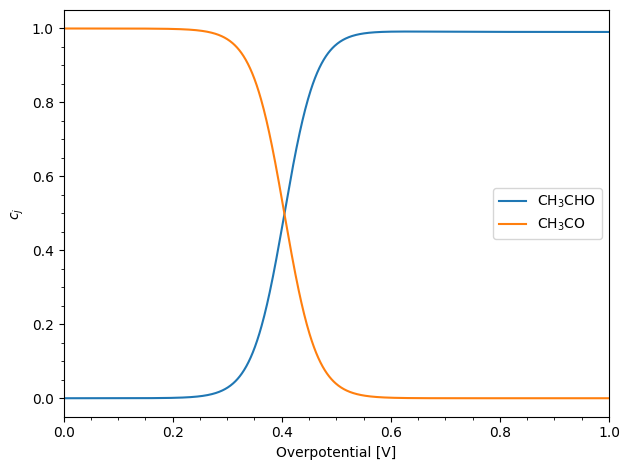

In [13]:
fname = os.path.join(directory, "SanchezEthanol_concentrations.png")
plt.plot(melek_cstr.potential, melek_cstr.results.c_products[:, 0], label=r"CH$_3$CHO")
plt.plot(melek_cstr.potential, melek_cstr.results.c_reactants[:, 0], label=r"CH$_3$CO")
plt.xlabel("Overpotential [V]")
plt.ylabel(r"$c_j$")
plt.xlim(0, 1)
plt.minorticks_on()
plt.tight_layout()
plt.legend()
plt.savefig(fname, dpi=300, bbox_inches="tight", format="png")
plt.show()